In [1]:
import cartopy.crs as ccrs
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.patches as mpatches

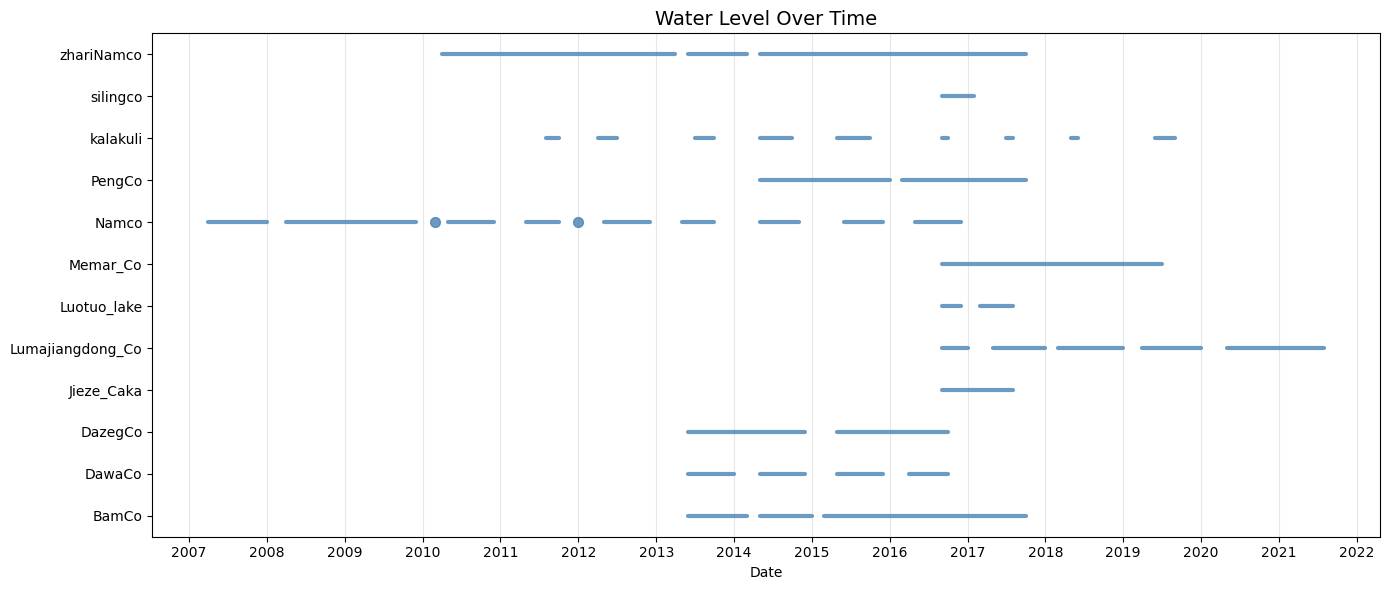

In [2]:
# Statistics of all in-situ data
input_path = r'D:\Desktop\insitu_lakes_alldata.xlsx'
df_all = pd.read_excel(input_path)

df_all['date'] = pd.to_datetime(df_all['date'], errors='coerce')
df_all = df_all.dropna(subset=['date', 'water_level'])
#Monthly deduplication
df_all['year_month'] = df_all['date'].dt.to_period('M')
monthly = df_all.drop_duplicates(['lake_name', 'year_month'])[['lake_name','year_month']]
monthly['year_month_dt'] = monthly['year_month'].dt.to_timestamp()

fig, ax = plt.subplots(figsize=(14, 6))
lakes = sorted(monthly['lake_name'].unique())
y_positions = {lake: i for i, lake in enumerate(lakes)}

# Draw disconnectable straight lines for each lake
for lake in lakes:
    lake_data = monthly[monthly['lake_name'] == lake]['year_month_dt'].sort_values()
    y = y_positions[lake]
    
    if len(lake_data) > 0:
        # Find consecutive time periods
        segments = []
        current_segment = [lake_data.iloc[0]]
        
        for i in range(1, len(lake_data)):
            prev_month = lake_data.iloc[i-1].replace(day=28)
            next_month = prev_month + pd.DateOffset(months=1)
            
            if lake_data.iloc[i] > next_month:
                segments.append(current_segment)
                current_segment = [lake_data.iloc[i]]
            else:
                current_segment.append(lake_data.iloc[i])
        
        segments.append(current_segment)
        
        for segment in segments:
            if len(segment) > 1:
                ax.plot(segment, [y] * len(segment), color='steelblue', linewidth=3, alpha=0.8, solid_capstyle='round')
            else:
                ax.scatter(segment, [y], color='steelblue', s=50, alpha=0.8, zorder=3)

ax.set_yticks(range(len(lakes)))
ax.set_yticklabels(lakes)
ax.set_ylim(-0.5, len(lakes)-0.5)
ax.set_xlabel('Date')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(True, axis='x', alpha=0.3)
ax.set_axisbelow(True)
plt.title('Water Level Over Time', fontsize=14)
plt.tight_layout()
plt.show()
